<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/kmeans/blob/main/kmeans_kmedias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">K-means (K-médias)</h2>

Data Scientist.: Karina Gonçalves 

Links de estudo:
 * [Repositório- github](https://github.com/CodigoMaquina/code/blob/main/machine_learning_python/k-medias.ipynb)

 * [K-means (o K-medias) para detección de clusters](https://www.youtube.com/watch?v=mICySHB0fh4&ab_channel=C%C3%B3digoM%C3%A1quina)

## Segmentação de clientes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000, 
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000],
                         
                         "transacoes": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 3]})

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


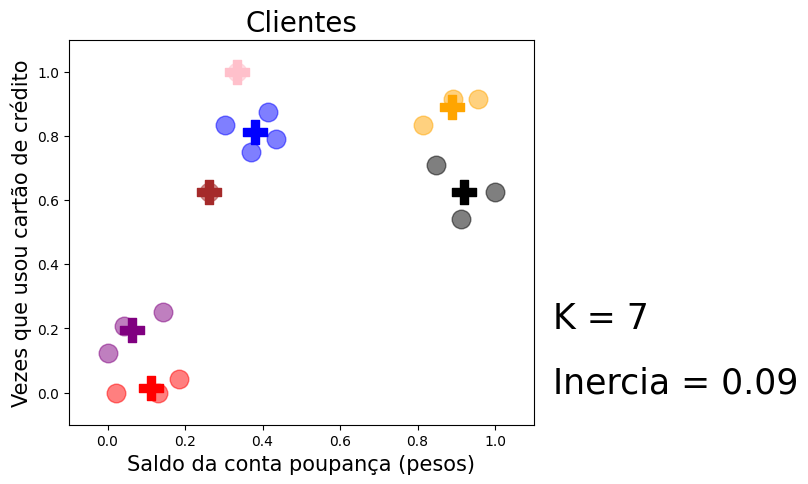

In [3]:
escalador = MinMaxScaler().fit(clientes.values)

clientes = pd.DataFrame(escalador.transform(clientes.values),
                       columns=["saldo", "transacoes"])

kmeans = KMeans(n_clusters=7).fit(clientes.values)

clientes["cluster"] = kmeans.labels_

# Instruções para graficar os clusters 

plt.figure(figsize=(6, 5), dpi=100)

cores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacoes"],
                marker="o", s=180, color=cores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=cores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo da conta poupança (pesos)", fontsize=15)
plt.ylabel("Vezes que usou cartão de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

del clientes["cluster"] 